## Analyzing the Air bnb datasets for Seattle and Boston

### Part of the first project for DataScience Nanodegree from Udacity

### Data Scientist: Rafael Mata M.

### Date: 15 October 2020

#### Import the libraries 

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the datasets

In [115]:
boston_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Boston/'
seattle_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Seattle/'

#### Boston Datasets

In [116]:
boston_df_listings = pd.read_csv(boston_dir+'listings.csv')
boston_df_calendar = pd.read_csv(boston_dir+'calendar.csv')
boston_df_reviews = pd.read_csv(boston_dir+'reviews.csv')
print('Boston datasets read...')

Boston datasets read...


#### Seattle Datasets

In [117]:
seattle_df_listings = pd.read_csv(seattle_dir+'listings.csv')
seattle_df_calendar = pd.read_csv(seattle_dir+'calendar.csv')
seattle_df_reviews = pd.read_csv(seattle_dir+'reviews.csv')
print('Seattle datasets read...')

Seattle datasets read...


## EDA for both datasets

#### Datasets shapes

In [462]:
print('BOSTON datasets Shape')
print('Listings dataset: {}'.format(boston_df_listings.shape))
print('Calendar dataset: {}'.format(boston_df_calendar.shape))
print('Reviews dataset: {}'.format(boston_df_reviews.shape))

BOSTON datasets Shape
Listings dataset: (3585, 95)
Calendar dataset: (1308890, 7)
Reviews dataset: (68275, 9)


In [463]:
print('SEATTLE datasets Shape')
print('Listings dataset: {}'.format(seattle_df_listings.shape))
print('Calendar dataset: {}'.format(seattle_df_calendar.shape))
print('Reviews dataset: {}'.format(seattle_df_reviews.shape))

SEATTLE datasets Shape
Listings dataset: (3818, 92)
Calendar dataset: (1393570, 7)
Reviews dataset: (84849, 9)


### Remove features from listings that are not going to be considered in the analysis

#### Nan values in the datasets

In [120]:
boston_nulls_listings = boston_df_listings.isnull().sum()/boston_df_listings.shape[0]*100
boston_nulls_calendar = boston_df_calendar.isnull().sum()/boston_df_calendar.shape[0]*100
boston_nulls_reviews  = boston_df_reviews.isnull().sum()/boston_df_reviews.shape[0]*100


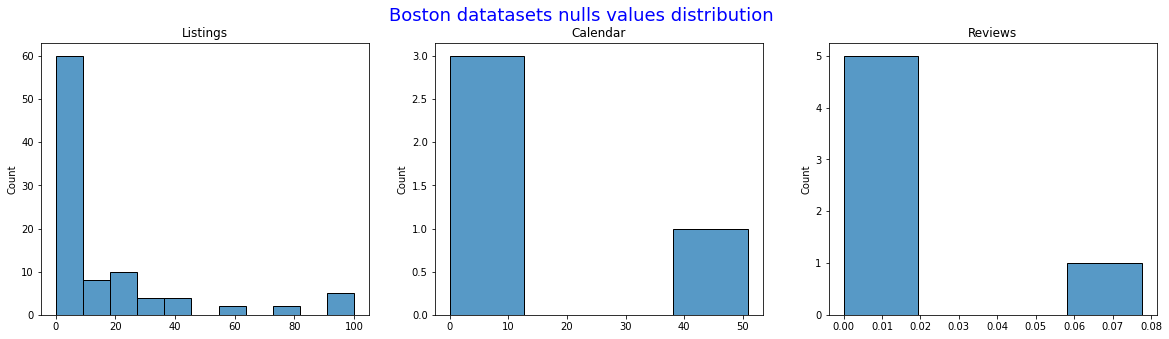

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) 
fig.suptitle('Boston datatasets nulls values distribution', fontsize=18, c='b')
#boston_nulls_listings.hist(ax=ax[0])
sns.histplot(data=boston_nulls_listings,x=boston_nulls_listings.values ,discrete=False,ax=ax[0])
sns.histplot(data=boston_nulls_calendar,x=boston_nulls_calendar.values ,discrete=False,ax=ax[1])
sns.histplot(data=boston_nulls_reviews,x=boston_nulls_reviews.values ,discrete=False,ax=ax[2])
ax[0].set_title('Listings')
ax[1].set_title('Calendar')
ax[2].set_title('Reviews');

In [122]:
seattle_nulls_listings = seattle_df_listings.isnull().sum()/seattle_df_listings.shape[0]*100
seattle_nulls_calendar = seattle_df_calendar.isnull().sum()/seattle_df_calendar.shape[0]*100
seattle_nulls_reviews  = seattle_df_reviews.isnull().sum()/seattle_df_reviews.shape[0]*100

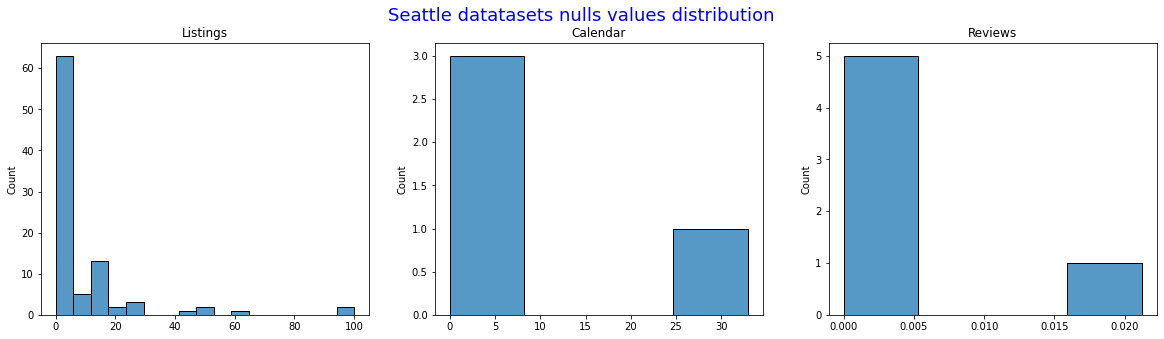

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) 
fig.suptitle('Seattle datatasets nulls values distribution', fontsize=18, c='b')

sns.histplot(data=seattle_nulls_listings,x=seattle_nulls_listings.values ,discrete=False,ax=ax[0])
sns.histplot(data=seattle_nulls_calendar,x=seattle_nulls_calendar.values ,discrete=False,ax=ax[1])
sns.histplot(data=seattle_nulls_reviews,x=seattle_nulls_reviews.values ,discrete=False,ax=ax[2])
ax[0].set_title('Listings')
ax[1].set_title('Calendar')
ax[2].set_title('Reviews');

### It looks that in both cities Seattle and Boston the Listings datasets have the more columns with Nan values

#### Columns with more than 50% Nan Values

In [124]:
print('BOSTON')
print('Listings dataset columns with more than 50% Nan values')
boston_df_listings.columns[boston_nulls_listings >= 50]

BOSTON
Listings dataset columns with more than 50% Nan values


Index(['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')

In [125]:
print('SEATTLE')
print('Listings dataset columns with more than 50% Nan values')
seattle_df_listings.columns[seattle_nulls_listings >= 50]

SEATTLE
Listings dataset columns with more than 50% Nan values


Index(['square_feet', 'monthly_price', 'security_deposit', 'license'], dtype='object')

### Convert date columns to year, month, week, dayofWeek

In [207]:
boston_df_calendar['month'] = pd.to_datetime(boston_df_calendar['date']).dt.month
boston_df_calendar['year'] = pd.to_datetime(boston_df_calendar['date']).dt.year
boston_df_calendar['dayofweek'] = pd.to_datetime(boston_df_calendar['date']).dt.dayofweek

In [208]:
seattle_df_calendar['month'] = pd.to_datetime(seattle_df_calendar['date']).dt.month
seattle_df_calendar['year'] = pd.to_datetime(seattle_df_calendar['date']).dt.year
seattle_df_calendar['dayofweek'] = pd.to_datetime(seattle_df_calendar['date']).dt.dayofweek

In [248]:
boston_df_reviews['month'] = pd.to_datetime(boston_df_reviews['date']).dt.month
boston_df_reviews['year'] = pd.to_datetime(boston_df_reviews['date']).dt.year
boston_df_reviews['dayofweek'] = pd.to_datetime(boston_df_reviews['date']).dt.dayofweek

In [250]:
seattle_df_reviews['month'] = pd.to_datetime(seattle_df_reviews['date']).dt.month
seattle_df_reviews['year'] = pd.to_datetime(seattle_df_reviews['date']).dt.year
seattle_df_reviews['dayofweek'] = pd.to_datetime(seattle_df_reviews['date']).dt.dayofweek

In [127]:
boston_df_listings.shape

(3585, 95)

In [128]:
boston_df_calendar.shape

(1308890, 4)

In [130]:
boston_df_reviews.shape

(68275, 6)

In [253]:
boston_df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'month', 'year', 'dayofweek'],
      dtype='object')

In [136]:
boston_df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [137]:
boston_df_calendar.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [216]:
boston_df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [219]:
boston_df_calendar.query('listing_id == 12147973').count()

listing_id    365
date          365
available     365
price           0
month         365
year          365
dayofweek     365
dtype: int64

In [222]:
boston_df_listings.id.value_counts()

7984226     1
14282764    1
8518665     1
7693009     1
5521378     1
           ..
6014302     1
12094488    1
1819994     1
9755993     1
1112067     1
Name: id, Length: 3585, dtype: int64

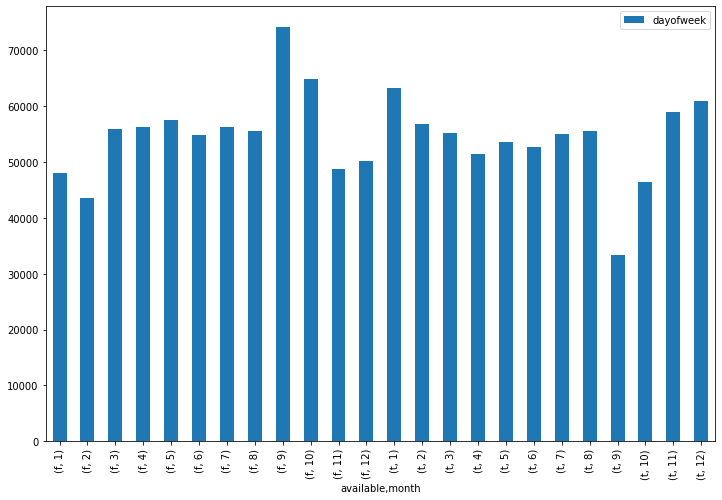

In [188]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
month_b.plot.bar(ax=ax);

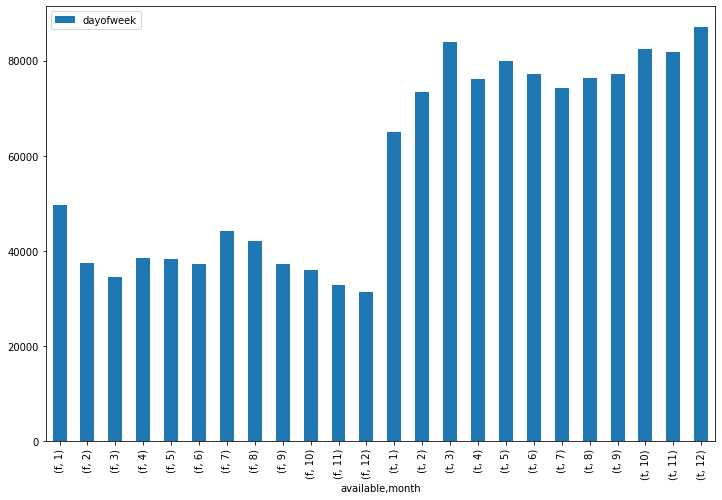

In [189]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
month_s.plot.bar(ax=ax);

In [458]:
listings_features = ['id', 'summary', 'space', 'neighborhood_overview', 'transit', 'access', 
                      'house_rules', 'host_response_rate', 'host_acceptance_rate',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price', 
       'guests_included', 'extra_people', 
       'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'cancellation_policy', 'reviews_per_month']

In [459]:
boston_listings_df2 = boston_df_listings[listings_features]

In [460]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 30)
boston_listings_df2.head(5)

,id,summary,space,neighborhood_overview,transit,access,house_rules,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month
0,12147973,"Cozy, sunny, family home. ...",The house has an open and ...,"Roslindale is quiet, conve...",The bus stop is 2 blocks a...,You will have access to 2 ...,Clean up and treat the hom...,NaN,NaN,Roslindale,02131,42.282619,-71.133068,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Ki...",$250.00,1,$0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN
1,3075044,Charming and quiet room in...,Small but cozy and quite r...,"The room is in Roslindale,...",Plenty of safe street park...,Apt has one more bedroom (...,Pet friendly but please co...,100%,100%,Roslindale,02131,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Int...",$65.00,0,$0.00,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,moderate,1.30
2,6976,"Come stay with a friendly,...","Come stay with a friendly,...",The LOCATION: Roslindale i...,PUBLIC TRANSPORTATION: Fro...,I am living in the apartme...,I encourage you to use my ...,100%,88%,Roslindale,02131,42.292438,-71.135765,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless I...",$65.00,1,$20.00,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,moderate,0.47
3,1436513,Come experience the comfor...,Most places you find in Bo...,Roslindale is a lovely lit...,There are buses that stop ...,The basement has a washer ...,- The bathroom and house a...,100%,50%,Roslindale,NaN,42.281106,-71.121021,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Int...",$75.00,2,$25.00,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.00
4,7651065,"My comfy, clean and relaxi...","Clean, attractive, private...",I love the proximity to do...,From Logan Airport and So...,You will have access to th...,Please no smoking in the h...,100%,100%,Roslindale,02131,42.284512,-71.136258,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Intern...",$79.00,1,$0.00,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,flexible,2.25


In [461]:
boston_listings_df2.cancellation_policy.isnull().sum()

0

In [447]:
boston_listings_df2.shape

(3585, 37)

In [265]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rafaelmata357/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [268]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rafaelmata357/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [327]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = "This is a sample sentence, showing off the stop words filtration."
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(example_sent)
stop_words.add('.')
stop_words.add(',')


print(word_tokens)

filtered_sentence = [w for w in word_tokens if not w in stop_words]
print(" ".join(filtered_sentence))

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
This sample sentence showing stop words filtration


In [328]:
def tokens(x):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(x)
    stop_words.add('.')
    stop_words.add(',')
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)
    

In [329]:
tokens(example_sent)

'This sample sentence showing stop words filtration'

In [330]:
df = boston_listings_df2[['id','summary','space','neighborhood_overview','transit','access']].copy()
df

,id,summary,space,neighborhood_overview,transit,access
0,12147973,"Cozy, sunny, family home. Master bedroom high ceilings. Deck, gar...",The house has an open and cozy feel at the same time. The living ...,"Roslindale is quiet, convenient and friendly. For Southern food t...","The bus stop is 2 blocks away, and frequent. Bus is about a 10 min...","You will have access to 2 bedrooms, a living room, kitchen, bathro..."
1,3075044,Charming and quiet room in a second floor 1910 condo building. The...,Small but cozy and quite room with a full size bed. Ample street p...,"The room is in Roslindale, a diverse and primarily residential nei...",Plenty of safe street parking. Bus stops a few hundred feet from h...,Apt has one more bedroom (which I use) and large living space and ...
2,6976,"Come stay with a friendly, middle-aged guy in the safe and quiet R...","Come stay with a friendly, middle-aged guy in the safe and quiet R...",The LOCATION: Roslindale is a safe and diverse Boston neighborhood...,"PUBLIC TRANSPORTATION: From the house, quick public transportation...","I am living in the apartment during your stay, and I work from hom..."
3,1436513,Come experience the comforts of home away from home in our fabulou...,Most places you find in Boston are small however our bedroom suite...,Roslindale is a lovely little neighborhood located right in the ci...,There are buses that stop right in front of the house and down the...,The basement has a washer dryer and gym area. There is a smart TV ...
4,7651065,"My comfy, clean and relaxing home is one block away from the bus l...","Clean, attractive, private room, one block from the bus line, on a...","I love the proximity to downtown, the neighborhood pride, safety, ...",From Logan Airport and South Station you have 3 options to get to...,"You will have access to the front and side porches, the living roo..."
...,...,...,...,...,...,...
3580,8373729,5 min walking to Orange Line subway with 2 stops to North Station ...,NaN,NaN,NaN,NaN
3581,14844274,"Most popular apartment in BU, best located in Brookline, right nex...",Best location in BU,NaN,"There is green line, BU shuttle in front of the apartment",NaN
3582,14585486,Funky little apartment close to public transport and also walking ...,"Modern and relaxed space with many facilities in the building, suc...","Cambridge is a short walk into Boston, and set on the Charles Rive...","Public transport is 5 minuts away, but walking is great option.",The whole place including social areas is yours to use.
3583,14603878,"My place is close to Taco Loco Mexican Grill, Somerville Public Li...",NaN,NaN,NaN,NaN


In [331]:

import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
 

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [342]:
df['access_s'] = df['access'].astype(str)
#apply(preprocess)

In [343]:
df.dtypes

id                        int64
summary                  object
space                    object
neighborhood_overview    object
transit                  object
access                   object
n                        object
token_n                  object
transit_s                object
transit_token            object
access_s                 object
dtype: object

In [344]:
df['access_token'] = df['access_s'].apply(preprocess)

In [345]:

from collections import Counter
Counter(" ".join(df["access_token"]).split()).most_common(10)

[('nan', 1489),
 ('access', 1139),
 ('room', 1043),
 ('kitchen', 947),
 ('guest', 860),
 ('live', 581),
 ('use', 579),
 ('apart', 568),
 ('bathroom', 545),
 ('park', 495)]

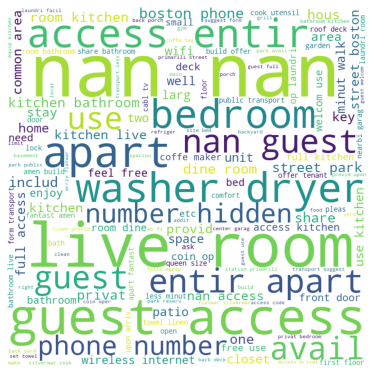

In [346]:
#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in df["access_token"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 